# INTRODUCTION

This is bank customer churn analysis with synthetic data retrieve from Maven Analytic free dataset . 
Link from here https://mavenanalytics.io/data-playground/bank-customer-churn.

This data 'Bank_Churn_Messy' is a messy dataset that needs cleaning first, and contain two sheet of table, 'Customer_Info' and 'Account_Info'.
Both table contains primary key 'CustomerId'.

This data contains account information for 10,000 customers at a European bank, including details on their credit score, balance, products, and whether they have churned.

The objectives:
1. What is overall demographic
2. What are segmentation exist within bank customers
3. What attributes that are common among churners.

This will contain 2 parts:
1. Data Cleaning 
Finished Data Cleaning process will be saved as Bank_Churn_Cleaned.csv
2. Exploratory Data Analysis


# PART 1 : DATA CLEANING

In [ ]:
import pandas as pd

In [93]:
# Loads all sheets
all_sheets = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name=None)

# Access them like this:
df1 = all_sheets['Customer_Info']
df2 = all_sheets['Account_Info']


In [94]:
# Lets have overview of df1 
df1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [95]:
# Lets have overview of df2 
df2.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


So, df1 and df2 has 'CustomerId' as coommon key. also Tenure is possibly same as both side. Lets merge them both.

In [96]:
# Merge df1 and df2 on the 'CustomerId' column
df = pd.merge(df1, df2, on='CustomerId')

df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [97]:
# Verify if the values of Tenure_x and Tenure_y are exactly the same
mismatch_tenure = (df['Tenure_x'] != df['Tenure_y']).sum()

print(f"Number of rows where Tenure values differ: {mismatch_tenure}")

Number of rows where Tenure values differ: 0


In [99]:
# So number of different rows in Tenure is 0, so we can remove either, keeping one column of 'Tenure' only

# 1. Remove the 'y' version
df.drop(columns=['Tenure_y'], inplace=True)

# 2. Rename the 'x' version back to the original name
df.rename(columns={'Tenure_x': 'Tenure'}, inplace=True)

# Verify the change
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='str')

In [100]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  str    
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  str    
 4   Gender           10004 non-null  str    
 5   Age              10001 non-null  float64
 6   Tenure           10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  str    
 8   Balance          10004 non-null  str    
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  str    
 11  IsActiveMember   10004 non-null  str    
 12  Exited           10004 non-null  int64  
dtypes: float64(1), int64(5), str(7)
memory usage: 1016.2 KB


In [101]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,NumOfProducts,Exited
count,1.000400e+04,10004.000000,10001.000000,10004.000000,10004.000000,10004.000000
mean,1.569092e+07,650.568073,38.919108,5.012195,1.529988,0.203719
std,7.193218e+04,96.665531,10.488725,2.891806,0.581635,0.402782
min,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.000000
25%,1.562839e+07,584.000000,32.000000,3.000000,1.000000,0.000000
50%,1.569071e+07,652.000000,37.000000,5.000000,1.000000,0.000000
75%,1.575322e+07,718.000000,44.000000,7.000000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,4.000000,1.000000


Looking at both df , df.info() & df.describe(), we try to draw some early decision on what to do with this data.
1. In 'Geography' , FRA and France probably refer to same country. We should sync and check out other inconsistencies in this column as well.
2. 'EstimatedSalary' and 'Balance' is str. We can remove € and make it numeric dtype.
3. 'HasCrCard' is Yes/No. We should switch it to boolean 1/0 for easier data manipulation. Much like other columns as well.
4. Column 'Surname' and 'Age' has nulls . We can check it if we can fill it or not. 
5. 'EstimatedSalary' min in negative value. Negative salary is impossible


In [102]:
# Count no of rows its duplicated
df.duplicated().sum()

np.int64(4)

In [ ]:
# Lets check rows where it duplicated
df[df.duplicated(keep=False)]

In [104]:
# Found 3 , so drop duplicates
df = df.drop_duplicates()

# Verify if duplicated rows has been drop.
df.duplicated().sum()

np.int64(0)

### Sync France in 'Geography'

In [107]:
# Lets check 'Geography'.
df['Geography'].unique()

<StringArray>
['FRA', 'Spain', 'French', 'France', 'Germany']
Length: 5, dtype: str

In [108]:
# So from result, we can see 'FRA', 'French' is referencing as same thing 'France'
# Lets replace them
df['Geography'] = df['Geography'].replace(['FRA', 'French'], 'France')

#Verify again after replace
df['Geography'].unique()

<StringArray>
['France', 'Spain', 'Germany']
Length: 3, dtype: str

### Change data=type 'EstimatedSalary' and 'Balance' to numeric

In [109]:
# Create a list of columns to clean
cols_to_fix = ['EstimatedSalary', 'Balance']

for col in cols_to_fix:
    # 1. Remove €, commas, and any leading/trailing whitespace
    df[col] = df[col].str.replace('€', '', regex=False)
    df[col] = df[col].str.strip()
    
    # 2. Convert to float
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [110]:
print(df[['EstimatedSalary', 'Balance']].dtypes)

EstimatedSalary    float64
Balance            float64
dtype: object


In [111]:
df[['EstimatedSalary', 'Balance']].head()

,EstimatedSalary,Balance
0,101348.88,0.00
2,112542.58,83807.86
3,113931.57,159660.80
4,93826.63,0.00
5,79084.10,125510.82


### Revise 'HasCrCard' , 'IsActiveMember' and 'Gender' as 1,0  

In [116]:
# Check data available and to verify
df['HasCrCard'].unique()

array([1, 0])

In [117]:
df['IsActiveMember'].unique()

array([1, 0])

In [118]:
df['Gender'].unique()

array([1, 0])

In [115]:
# Replace them
yesno = {'Yes': 1, 'No': 0}
gender_map = {'Female': 1, 'Male': 0}

# Apply the map to both columns
df['HasCrCard'] = df['HasCrCard'].map(yesno)
df['IsActiveMember'] = df['IsActiveMember'].map(yesno)
df['Gender'] = df['Gender'].map(gender_map)


### Checkout null value in 'Surname' and 'Age' and 'EstimatedSalary' is negative. 

In [119]:
# so check if either blank
df[df['Surname'].isna() | df['Age'].isna()]


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,1,NaN,3,-999999.0,141349.43,1,1,1,0
122,15580203,NaN,674,Spain,0,NaN,6,-999999.0,120193.42,1,0,0,0
9390,15756954,NaN,538,France,1,NaN,2,-999999.0,0.00,1,1,1,0


In [120]:
# Check which rows with negativesalary
df[df['EstimatedSalary'] < 0]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,1,NaN,3,-999999.0,141349.43,1,1,1,0
122,15580203,NaN,674,Spain,0,NaN,6,-999999.0,120193.42,1,0,0,0
9390,15756954,NaN,538,France,1,NaN,2,-999999.0,0.00,1,1,1,0


3 rows of 'Surname' are null. We can fill this with "Unknown'.
3 rows of 'Age' are null. 2 ways to fill this, we can impute with median. or Just leave it as is.
3 rows of 'EstimatedSalary is -999999. We can fill this with median salary. or delete the rows.

Affected rows are 3 out of 100000 rows equivalent to 0.0003% of data. Based on 5% rule, whatever we do towards this these rows are statistically insignificant. 
We can delete it or fill it. But since this is portfolio project, lets fill it.

In [ ]:
#Fill all null in 'Surname' as Unkown
df['Surname'] = df['Surname'].fillna('Unknown')

#Fill  all null in 'Age' as median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Replace all null in 'EstimatedSalary' as median
import numpy as np
# Find row where 'EstimatedSalary is 0, and make np.nan.
df.loc[df['EstimatedSalary'] < 0, 'EstimatedSalary'] = np.nan
# Then fill with median
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(df['EstimatedSalary'].median())

In [122]:
#Verify our data has been filled
df[df['Surname'] == 'Unknown' ]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,Unknown,574,Germany,1,37.0,3,100236.02,141349.43,1,1,1,0
122,15580203,Unknown,674,Spain,0,37.0,6,100236.02,120193.42,1,0,0,0
9390,15756954,Unknown,538,France,1,37.0,2,100236.02,0.00,1,1,1,0


Data is cleaned, let save to csv for next 

In [123]:
# Save to a new CSV file
df.to_csv('Bank_Churn_Cleaned.csv', index=False)

In [124]:
#Verify it has been saved
df = pd.read_csv('Bank_Churn_Cleaned.csv')

df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,1,42.0,2,101348.88,0.00,1,1,1,1
1,15647311,Hill,608,Spain,1,41.0,1,112542.58,83807.86,1,1,1,0
2,15619304,Onio,502,France,1,42.0,8,113931.57,159660.80,3,0,0,1
3,15701354,Boni,699,France,1,39.0,1,93826.63,0.00,2,0,0,0
4,15737888,Mitchell,850,Spain,1,43.0,2,79084.10,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,0,39.0,5,96270.64,0.00,2,0,0,0
9996,15569892,Johnstone,516,France,0,35.0,10,101699.77,57369.61,1,1,1,0
9997,15584532,Liu,709,France,1,36.0,7,42085.58,0.00,1,1,1,1
9998,15682355,Sabbatini,772,Germany,0,42.0,3,92888.52,75075.31,2,0,0,1


# PART 2: EXPLORATORY DATA ANALYSIS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('Bank_Churn_Cleaned.csv')

df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,1,42.0,2,101348.88,0.00,1,1,1,1
1,15647311,Hill,608,Spain,1,41.0,1,112542.58,83807.86,1,1,1,0
2,15619304,Onio,502,France,1,42.0,8,113931.57,159660.80,3,0,0,1
3,15701354,Boni,699,France,1,39.0,1,93826.63,0.00,2,0,0,0
4,15737888,Mitchell,850,Spain,1,43.0,2,79084.10,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,0,39.0,5,96270.64,0.00,2,0,0,0
9996,15569892,Johnstone,516,France,0,35.0,10,101699.77,57369.61,1,1,1,0
9997,15584532,Liu,709,France,1,36.0,7,42085.58,0.00,1,1,1,1
9998,15682355,Sabbatini,772,Germany,0,42.0,3,92888.52,75075.31,2,0,0,1


## Demographics 
Overall demographic of bank customers by Gender, Country, and Age.

### Customer by Gender

In [5]:
# Calculate counts and percentages
gen_counts = df['Gender'].value_counts()
gen_pct = df['Gender'].value_counts(normalize=True) * 100

# Combine into a nice summary table
gen_summary = pd.DataFrame({
    'Count': gen_counts,
    'Percentage (%)': gen_pct.round(2)
})
gen_summary.index = gen_summary.index.map({1: 'Female', 0: 'Male'})
gen_summary

,Count,Percentage (%)
Gender,,
Male,5457,54.57
Female,4543,45.43


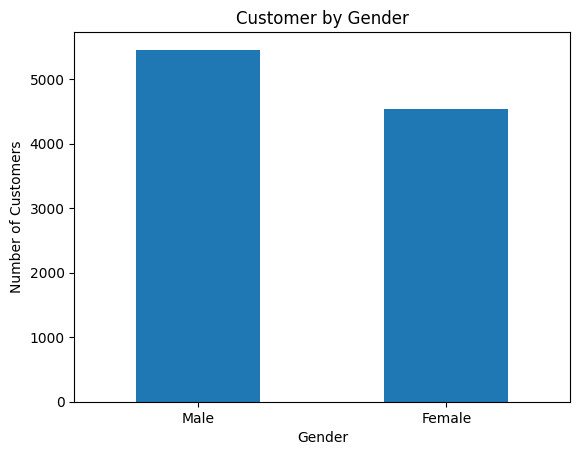

In [20]:
# Simple bar chart of the counts
gen_summary['Count'].plot(kind='bar')

plt.title('Customer by Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0) # Keeps country names horizontal
plt.show()

### Customer by Country

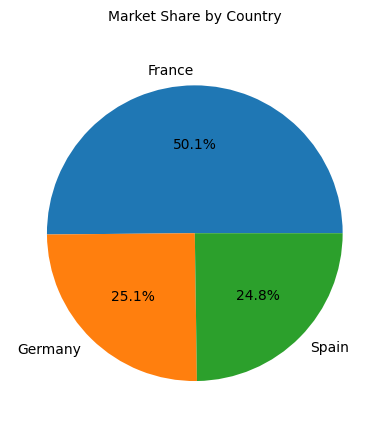

In [ ]:
#Calculate the percentage
geo_summary = df['Geography'].value_counts(normalize=True) * 100

geo_summary.plot(kind='pie', autopct='%1.1f%%') 

# 3. Cleaning up the look
plt.ylabel('') 
plt.title('Market Share by Country', fontsize=10, pad=20)
plt.show()

### Customer Age Distribution

C:\Users\PC\AppData\Local\Temp\ipykernel_7800\1202540290.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


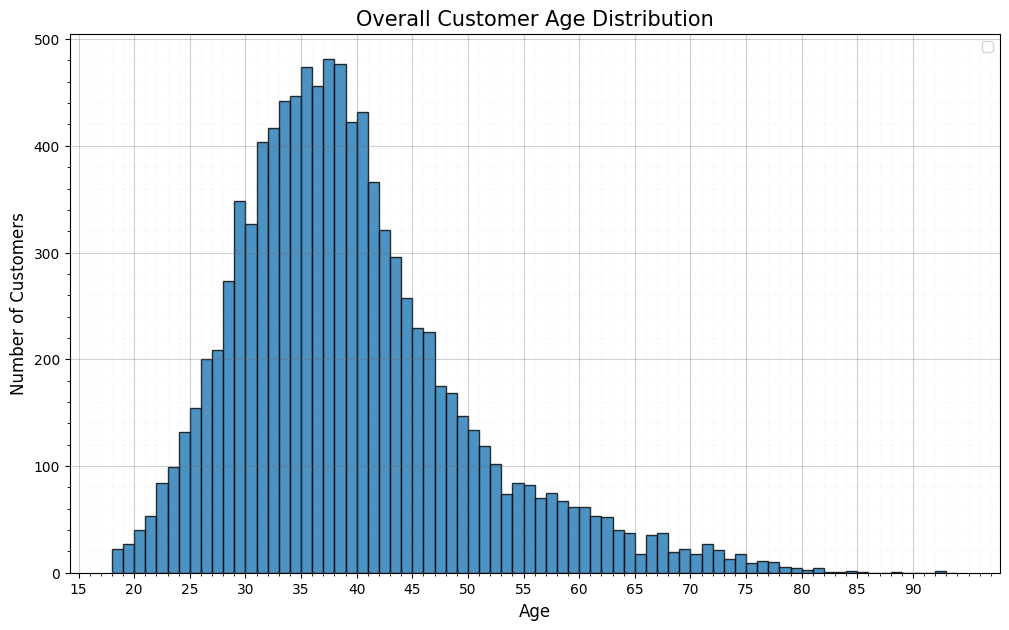

In [34]:
# 1. Setup the plot
plt.figure(figsize=(12, 7))

# 2. Create the Histogram
# bins=range(15, 95, 1) creates a bar for every single year of age
plt.hist(df['Age'], bins=range(18, 95, 1), edgecolor='black', alpha=0.8)

# 3. HIGH-PRECISION GRID
plt.xticks(np.arange(15, 95, 5))
plt.grid(which='major', axis='both', color='#666666', linestyle='-', alpha=0.3)
plt.minorticks_on()
plt.grid(which='minor', axis='both', color='#999999', linestyle=':', alpha=0.1)

# 5. Final Labels
plt.title('Overall Customer Age Distribution', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend()

plt.show()

## Segmentation 
 No of Product they have, Has Credit Card ? and Tenure 

### Customer by Number of products they have. 

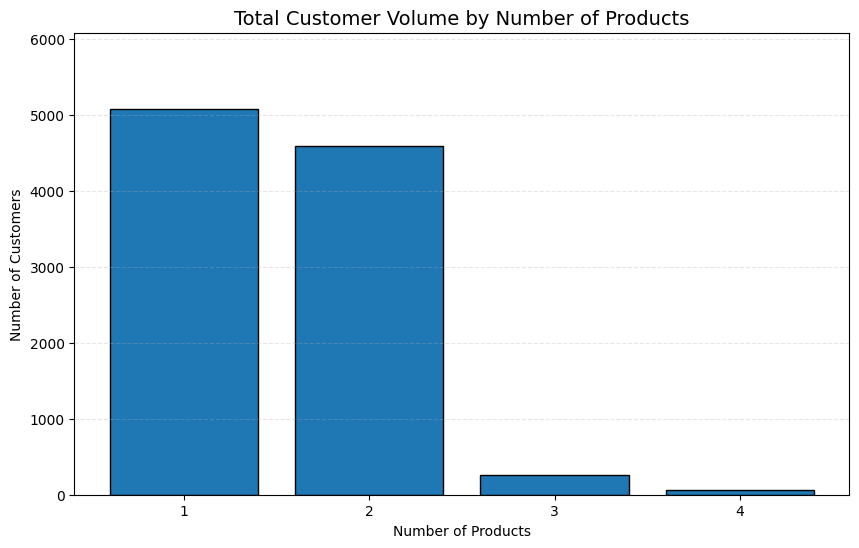

In [ ]:
# 1. Calculate the total volume by Number of product 
prod_counts = df['NumOfProducts'].value_counts().sort_index()

# 2. Plotting the total volume
plt.figure(figsize=(10, 6))
plt.bar(prod_counts.index.astype(str), prod_counts.values,  edgecolor='black')

# 3. Adding the high-precision grid
plt.grid(axis='y', linestyle='--', alpha=0.3)


plt.title('Total Customer Volume by Number of Products', fontsize=14)
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.ylim(0, max(prod_counts.values) + 1000)

plt.show()

### Has Credit Card vs No Credit Card

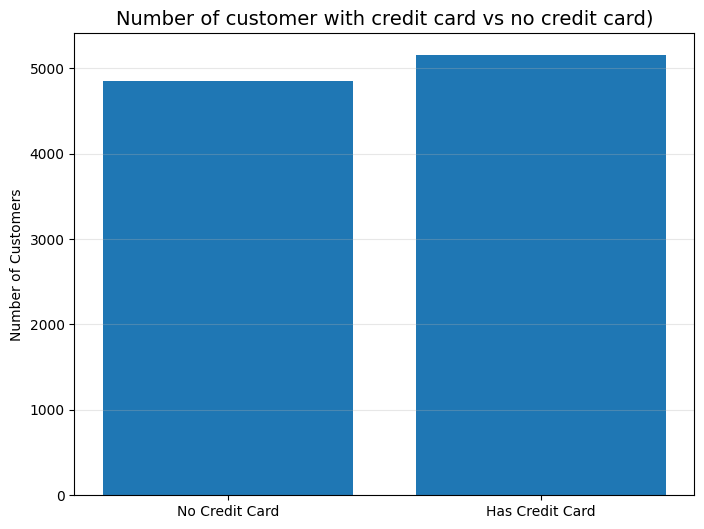

In [ ]:
# 1. Calculate the total counts 
card_counts = df['HasCrCard'].value_counts().sort_index()

# 2. Plotting the total volume
plt.figure(figsize=(8, 6))
plt.bar(card_counts.index.astype(str), card_counts.values)

# 3. Fixing the X-axis labels for your narrative
plt.xticks(ticks=[0, 1], labels=['No Credit Card', 'Has Credit Card'])

plt.title('Number of customer with credit card vs no credit card)', fontsize=14)
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.3)

plt.show()

### Overall Tenure

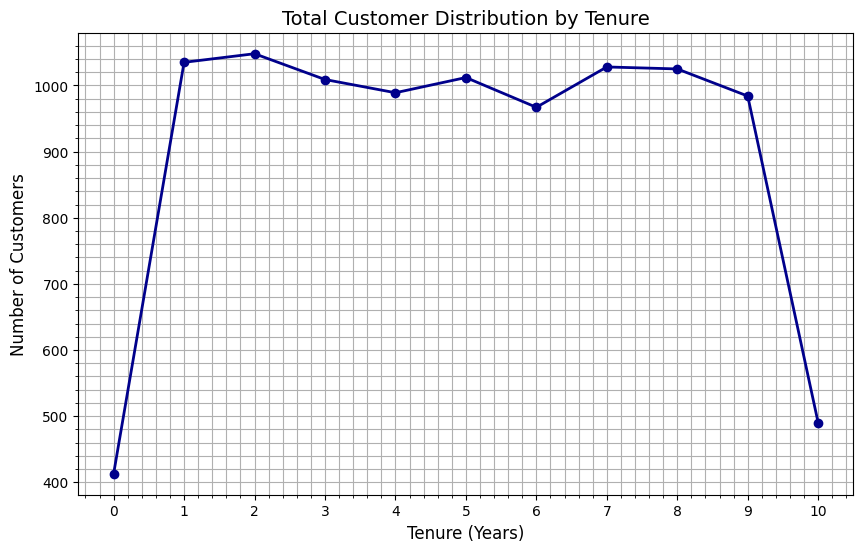

In [35]:
# 1. Calculate the total counts for each tenure year
tenure_counts = df['Tenure'].value_counts().sort_index()

# 2. Create the Line Plot
plt.figure(figsize=(10, 6))
plt.plot(tenure_counts.index, tenure_counts.values, marker='o', linestyle='-', color='darkblue', linewidth=2)

plt.xticks(range(11)) # Years 0 to 10
plt.grid(which='major', axis='both')
plt.minorticks_on()
plt.grid(which='minor', axis='both')

# 4. Labels and Title
plt.title('Total Customer Distribution by Tenure', fontsize=14)
plt.xlabel('Tenure (Years)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

plt.show()


## CORRELATION MATRIX 
Create correlation matrix to determine which feature to focus on.
Corr. matrix only works on numeric ,not strings. 
So for 'Geography' we have to use get_dummies to assign numeric value.

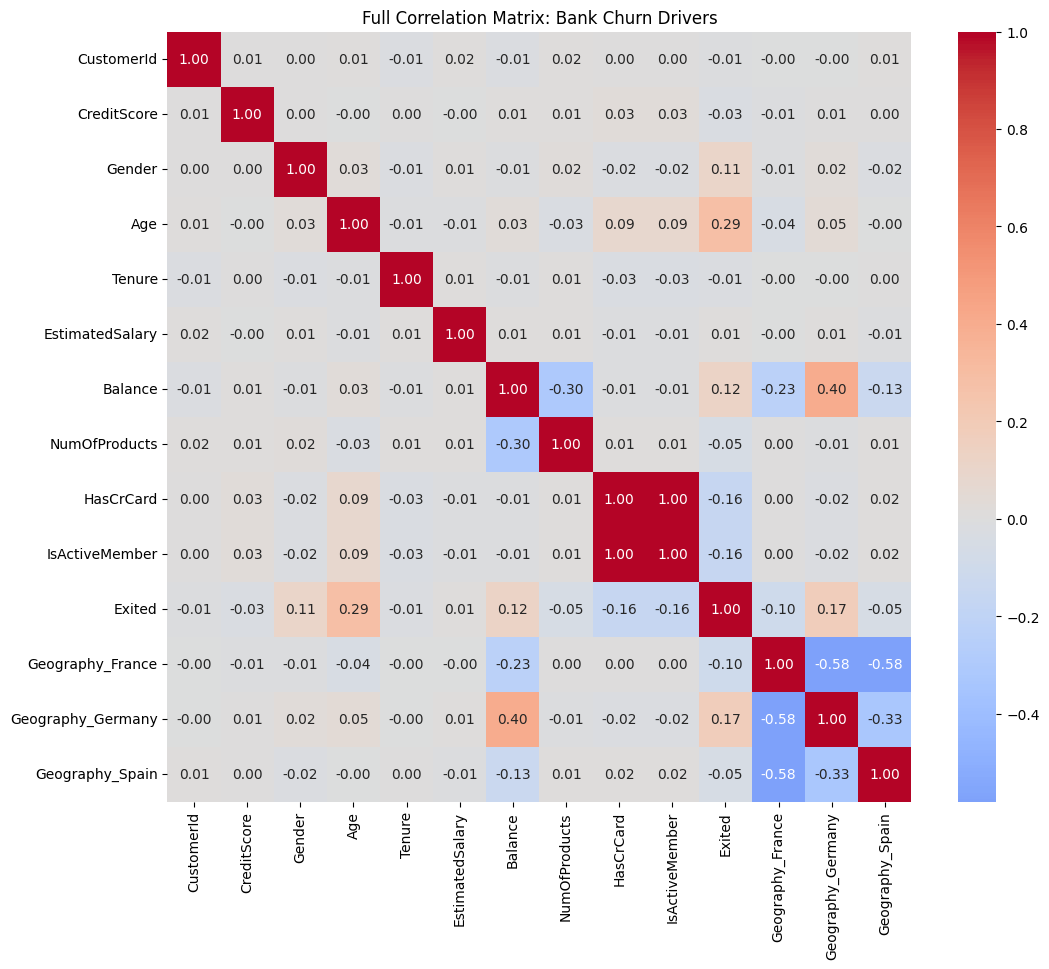

In [8]:
numeric_df = pd.get_dummies(df, columns=['Geography'])# assign numeric value to 'Geography' only.

full_corr = numeric_df.corr(numeric_only=True) # numeric_only abandon 'Surname'

#Focus on the 'Exited' column to see the strongest drivers
# Corr with > 0.1 is Churn Factors to study
# Corr with < 0.1 is Stay factors 
# Plot the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(full_corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Full Correlation Matrix: Bank Churn Drivers')
plt.show()


In [9]:
# Correlation table for Exited
print("Correlation with Churn (Exited):")
print(full_corr['Exited'].sort_values(ascending=False))

Correlation with Churn (Exited):
Exited               1.000000
Age                  0.285344
Geography_Germany    0.173488
Balance              0.118533
Gender               0.106512
EstimatedSalary      0.012079
CustomerId          -0.006248
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Geography_France    -0.104955
IsActiveMember      -0.156128
HasCrCard           -0.156128
Name: Exited, dtype: float64


In correlation matrix related to 'Exited', we want to see which feature has corr. more than 0.1 or less than 0.1. So, from here we can deduce
Churn factors : 'Age', 'Geography_Germany', 'Balance', 'Gender' ;
Stay factors: 'HasCrCard', 'IsActiveMember', 'Geography_France' ;
Irrelevant : 'EstimatedSalary','Tenure','CreditScore' , 'Geography_France' and 'NumOfProducts' 

Although both 'HasCrCard' and 'IsActiveMember' have the same corr. factor down to last 6 decimal which is to say is incredibly rare.
Possible both are same column named differently. If it true, we can define Active member as the one who has credit card.

In [70]:
# Check if HasCrCard and IsActiveMember are the same
are_identical = df['HasCrCard'].equals(df['IsActiveMember'])
print(f"Are HasCrCard and IsActiveMember identical? {are_identical}")

Are HasCrCard and IsActiveMember identical? True


### 'Age' Analysis


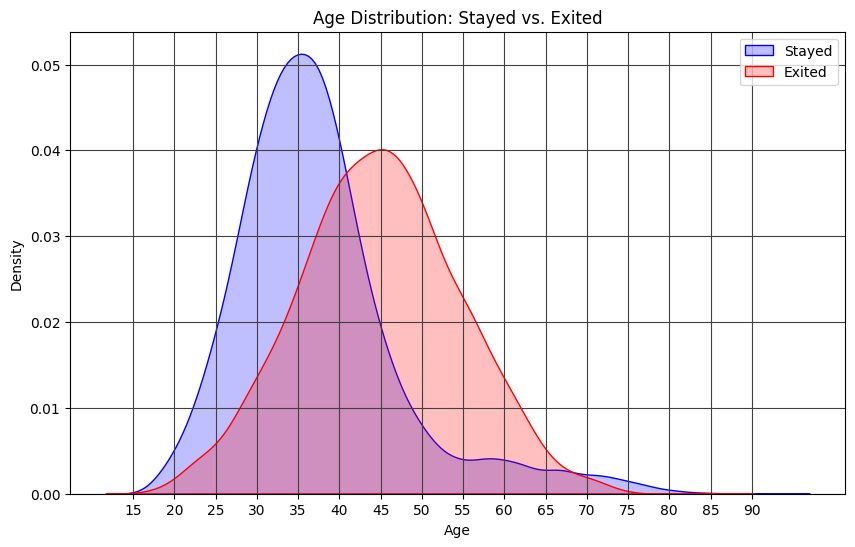

In [46]:
# Ensure we drop NaNs for the plot to avoid calculation errors
plot_df = df.dropna(subset=['Age', 'Exited'])

plt.figure(figsize=(10, 6))

# Plotting
sns.kdeplot(data=plot_df[plot_df['Exited'] == 0], x='Age', label='Stayed', fill=True, color='blue')
sns.kdeplot(data=plot_df[plot_df['Exited'] == 1], x='Age', label='Exited', fill=True, color='red')

# Setting the ticks
plt.xticks(np.arange(15, 95, 5)) # Started at 15 to give the 20 mark some breathing room
plt.grid(which='major', color="#443F3F", linestyle='-')
plt.title('Age Distribution: Stayed vs. Exited')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='x', linestyle='-') # Added a grid to make the 5-year gaps easier to follow
plt.show()

From this distribution, we can see that peak (median) for stayed customer at 35, exited at 45 and intersection at 40.
40 year old customer can serve as a turning point wether they stayed or churn.

To summary , churned factors are customer for age 45 years old. 

### Geography and Balance Analysis

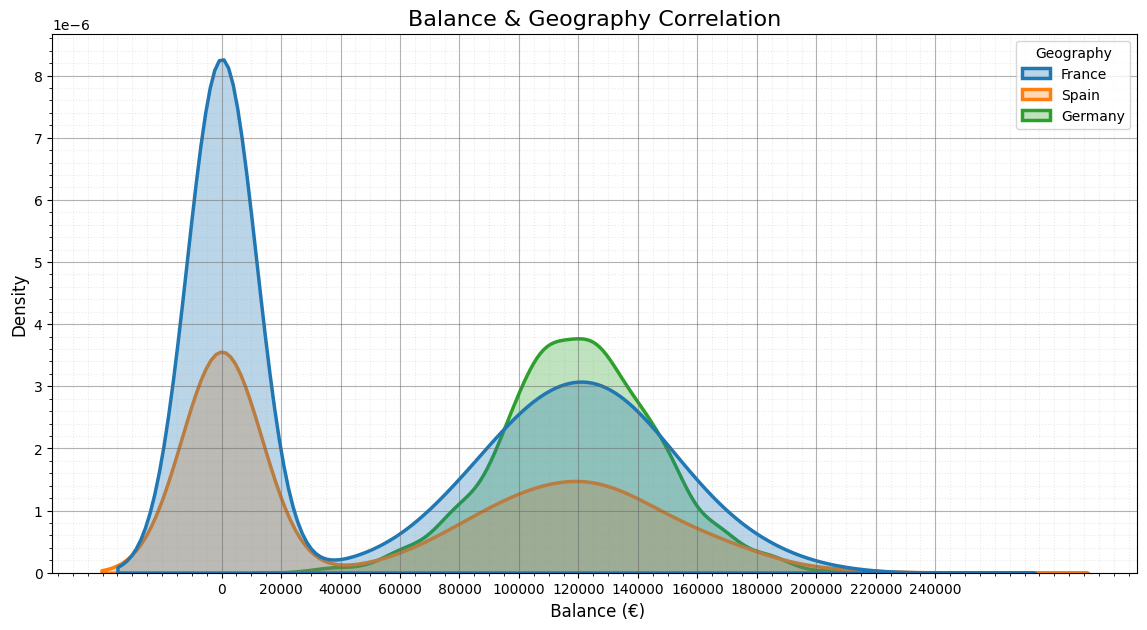

In [11]:
# 1. Setup the figure
plt.figure(figsize=(14, 7))

# 2. KDE Plot with hue to separate countries
# We use alpha for transparency so we can see where they overlap
sns.kdeplot(data=df, x='Balance', hue='Geography', fill=True, alpha=0.3, linewidth=2.5)

# 3. HIGH-PRECISION GRID (Major every 20k, Minor every 5k)
plt.xticks(np.arange(0, 260000, 20000))
plt.grid(which='major', color='#666666', linestyle='-', alpha=0.5)
plt.minorticks_on()
plt.grid(which='minor', color='#999999', linestyle=':', alpha=0.2)

# 4. Final Formatting
plt.title('Balance & Geography Correlation', fontsize=16)
plt.xlabel(' Balance (€)', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.show()

Why are we analyzing this? We have positive corr for 'Geography_Germany' to 'Exited' with 0.17 corr.
Then,when we see correlation matrix for 'Geography' , it only shows correlation to one feature only, 'Balance'
Here is the list of 'Balance v Geography' corr:
Geography_Germany 0.40
Geography_Spain  -0.13
Geography_France -0.23

Germany is a factor of Churn. Whereas Spain & France is factor to Stay.

From this plot,Its a bimodal distribution for France & Spain, but not for Germany. First peak at 0, and the other at around €120k.

We can disregard 0 balance customer for few reasons:
1. Churned country, Germany doesnt have 0 balance. But Stayed Country, Spain and France have many 0 balance account. 
2. 0 balance can be said as passively churned , is more like a result rather than symptom. 
3. Bank have zero financial gain to let customer with 0 balance have active account

To summarize , churned factors are For Germany with Balance is around €120k 

### Gender Analysis

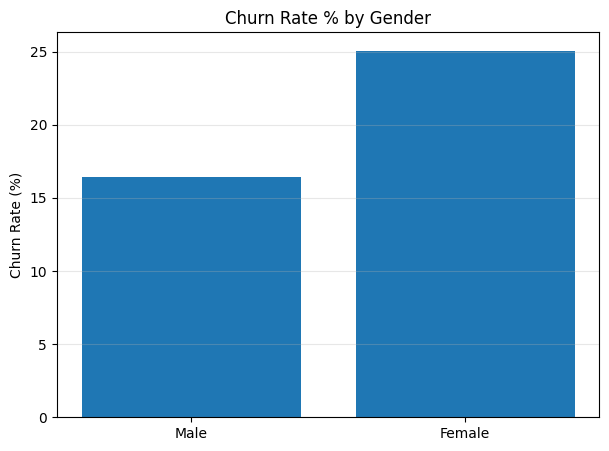

In [ ]:
gender_churn = df.groupby('Gender')['Exited'].mean() * 100

# 2. Create the plot
plt.figure(figsize=(7, 5))

# Use the index (0, 1) for x and the values for height
plt.bar(gender_churn.index, gender_churn.values)

# 3. FIX: Map the 0/1 to names on the X-axis labels only
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

# 4. Standard formatting
plt.title('Churn Rate % by Gender')
plt.ylabel('Churn Rate (%)')
plt.grid(axis='y', alpha=0.3)

plt.show()

'Gender' attribute to corr of 0.11. From this plot, we can see Female at 25% is at higher risk to churn than Male at 16%. The rest is stayed.
Female is 56% more likely than Male to churn.

Churn factor is Female.

### Conclusion for High risk churned customer

To summarize,below is the characteristic of high risk churned customers in terms of importance. 
1. Age: 45
2. Geography : Germany
3. Balance : Around €120,000.
4. Gender : Female.

Also, below is low risk churned customers.
1. Has Credit Card. 